In [3]:
library(tidyverse)
library(stringr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [4]:
training_files <- list.files(path = "sample_data/train_data/")
training_files

[1] "training_allergy.csv"              "training_allMeds.csv"             
 [3] "training_diagnosis.csv"            "training_immunization.csv"        
 [5] "training_labObservation.csv"       "training_labPanel.csv"            
 [7] "training_labResult.csv"            "training_labs.csv"                
 [9] "training_medication.csv"           "training_patient.csv"             
[11] "training_patientCondition.csv"     "training_patientSmokingStatus.csv"
[13] "training_patientTranscript.csv"    "training_prescription.csv"        
[15] "training_smoke.csv"                "training_transcript.csv"          
[17] "training_transcriptAllergy.csv"    "training_transcriptDiagnosis.csv" 
[19] "training_transcriptMedication.csv"

In [5]:
testing_files <- list.files(path = "sample_data/test_data/")
testing_files

[1] "test_allergy.csv"              "test_allMeds.csv"             
 [3] "test_diagnosis.csv"            "test_immunization.csv"        
 [5] "test_labObservation.csv"       "test_labPanel.csv"            
 [7] "test_labResult.csv"            "test_labs.csv"                
 [9] "test_medication.csv"           "test_patient.csv"             
[11] "test_patientCondition.csv"     "test_patientSmokingStatus.csv"
[13] "test_patientTranscript.csv"    "test_prescription.csv"        
[15] "test_smoke.csv"                "test_transcript.csv"          
[17] "test_transcriptAllergy.csv"    "test_transcriptDiagnosis.csv" 
[19] "test_transcriptMedication.csv"

In [6]:
c(length(testing_files), length(training_files))

[1] 19 19

In [7]:
training_files_names <- str_replace(training_files, "training_", "")
testing_files_names <- str_replace(testing_files, "test_", "")
table(training_files_names, testing_files_names)

                          testing_files_names
training_files_names       allergy.csv allMeds.csv diagnosis.csv
  allergy.csv                        1           0             0
  allMeds.csv                        0           1             0
  diagnosis.csv                      0           0             1
  immunization.csv                   0           0             0
  labObservation.csv                 0           0             0
  labPanel.csv                       0           0             0
  labResult.csv                      0           0             0
  labs.csv                           0           0             0
  medication.csv                     0           0             0
  patient.csv                        0           0             0
  patientCondition.csv               0           0             0
  patientSmokingStatus.csv           0           0             0
  patientTranscript.csv              0           0             0
  prescription.csv                   0      

In [8]:
training_data <- training_files %>% 
    map(~paste0("sample_data/train_data/", .x)) %>% 
    map(read_csv)

Parsed with column specification:
cols(
  AllergyGuid = col_character(),
  PatientGuid = col_character(),
  AllergyType = col_character(),
  StartYear = col_integer(),
  ReactionName = col_character(),
  SeverityName = col_character(),
  MedicationNdcCode = col_double(),
  MedicationName = col_character(),
  UserGuid = col_character()
)
Parsed with column specification:
cols(
  .default = col_character(),
  PrescriptionYear = col_integer(),
  RefillAsNeeded = col_integer(),
  GenericAllowed = col_integer(),
  StartYear = col_integer(),
  `MedicationNdcCode:1` = col_double()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  DiagnosisGuid = col_character(),
  PatientGuid = col_character(),
  ICD9Code = col_character(),
  DiagnosisDescription = col_character(),
  StartYear = col_integer(),
  StopYear = col_character(),
  Acute = col_integer(),
  UserGuid = col_character()
)
Parsed with column specification:
cols(
  ImmunizationGuid = col_character()

In [9]:
df <- training_data[c(10, 1, 2, 3)] %>% 
    reduce(inner_join, by = "PatientGuid") %>% 
    filter(!is.na(PatientGuid))

In [10]:
glimpse(df)

Observations: 544,005
Variables: 46
$ PatientGuid           <chr> "5BC4324E-B5D5-4AAB-A000-003EACACE12F", "5BC4...
$ dmIndicator           <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ Gender                <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", ...
$ YearOfBirth           <int> 1939, 1939, 1939, 1939, 1939, 1939, 1939, 193...
$ State                 <chr> "OH", "OH", "OH", "OH", "OH", "OH", "OH", "OH...
$ PracticeGuid          <chr> "D1166838-9D31-46E1-9FBE-43F7A1E0D5EA", "D116...
$ AllergyGuid.x         <chr> "BA3D76E2-1BE3-40E9-9762-9557073F9A08", "BA3D...
$ AllergyType.x         <chr> "Medication", "Medication", "Medication", "Me...
$ StartYear.x           <int> 2011, 2011, 2011, 2011, 2011, 2011, 2011, 201...
$ ReactionName.x        <chr> "Dizziness/Lightheadedness", "Dizziness/Light...
$ SeverityName.x        <chr> "Mild", "Mild", "Mild", "Mild", "Mild", "Mild...
$ MedicationNdcCode.x   <dbl> 12280039630, 12280039630, 12280039630, 122800...
$ MedicationName

In [17]:
t <- table(df$dmIndicator, df$Gender)

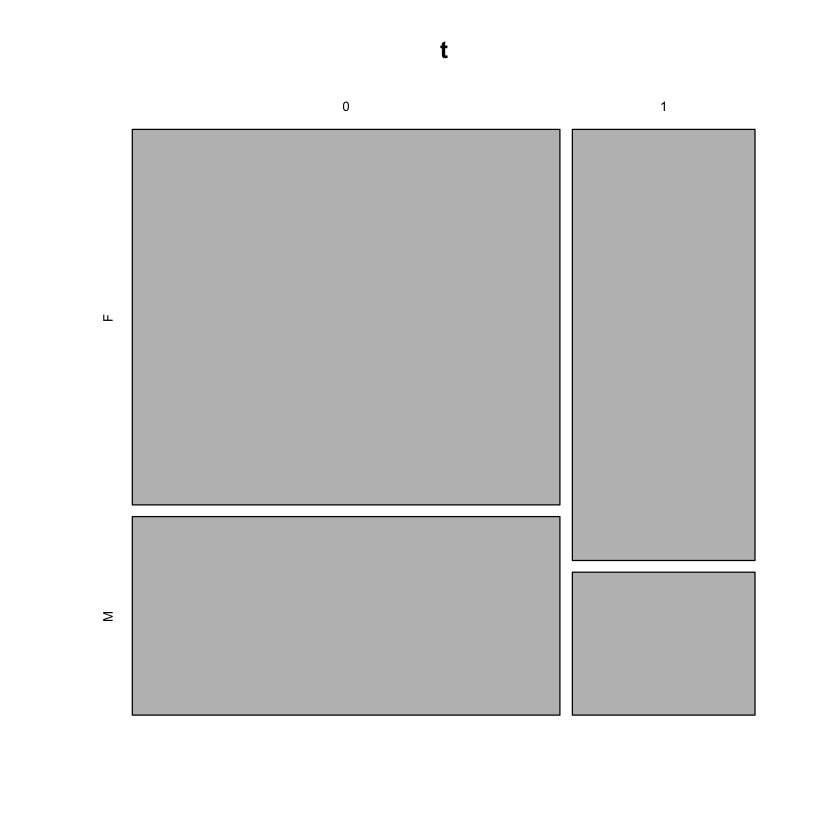

In [18]:
plot(t)